In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv('/content/sample_data/ecommerce_transaction_modified.csv')

In [3]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,ProductID,ProductCategory,Quantity,UnitPrice,CouponUsed,PaymentMethod,ReturnStatus,Country,DeliveryTime
0,INV100000,2022-03-11,CUST5192,PROD1377,Books,1,$284.77,0,Cash on Delivery,0,Australia,7
1,INV100001,2021-06-24,CUST5845,PROD1367,Garden & Outdoors,2,$240.32,1,Cash on Delivery,0,UK,6
2,INV100002,2021-08-27,CUST1523,PROD1462,Sports & Outdoors,1,$295.34,0,BankTransfer,0,India,7
3,INV100003,2021-09-17,CUST3318,PROD1330,Toys & Games,3,$356.61,0,Cash on Delivery,0,Germany,4
4,INV100004,2022-01-26,CUST5795,PROD1454,Video Games,1,$233.61,1,Cash on Delivery,0,Australia,10


In [4]:
df["UnitPrice"]=df["UnitPrice"].replace("[/$]"," ",regex=True).astype(float)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNo        100000 non-null  object 
 1   InvoiceDate      100000 non-null  object 
 2   CustomerID       100000 non-null  object 
 3   ProductID        100000 non-null  object 
 4   ProductCategory  100000 non-null  object 
 5   Quantity         100000 non-null  int64  
 6   UnitPrice        100000 non-null  float64
 7   CouponUsed       100000 non-null  int64  
 8   PaymentMethod    100000 non-null  object 
 9   ReturnStatus     100000 non-null  int64  
 10  Country          100000 non-null  object 
 11  DeliveryTime     100000 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 9.2+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CouponUsed,ReturnStatus,DeliveryTime
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,2.062870,250.069892,0.29854,0.082730,6.148030
std,1.466847,70.036210,0.45762,0.275475,2.118925
min,1.000000,5.000000,0.00000,0.000000,1.000000
25%,1.000000,202.787500,0.00000,0.000000,5.000000
50%,2.000000,250.185000,0.00000,0.000000,6.000000
75%,3.000000,297.382500,1.00000,0.000000,8.000000
max,10.000000,500.000000,1.00000,1.000000,10.000000


**Quantity**

- Most orders are for low quantities (median = 2).

- Distribution is right-skewed with a maximum of 10 units.

- Likely reflects individual or small-batch purchases.

**UnitPrice**

- Price range spans from $5 to $500, indicating diverse product offerings.

- High standard deviation (~70) reflects significant price variation.

- Mean and median are close ($₹250), suggesting a roughly symmetric distribution.

**CouponUsed**

- Only 29.85% of transactions used a coupon.

- Most users did not use coupons (median and 25th percentile = 0).

- Feature is binary (0 = not used, 1 = used).

**ReturnStatus**

- Approximately 9.95% of items were returned.

- Majority of orders were not returned (75th percentile = 0).

- Binary feature (0 = not returned, 1 = returned).

**DeliveryTime**

- The average delivery time is  ~6.15 days.

- The median is 6 days, with 75% of deliveries done by 8 days.

- Minimum is 1 day, maximum is 10 days.

- Distribution is left-skewed, peaking near 8–10 days, aligning with your modification.










In [7]:
df["CouponUsed"].value_counts()


,count
CouponUsed,
0,70146
1,29854


Approximately 30% of the total entries used a coupon, indicating that coupon usage is relatively low.

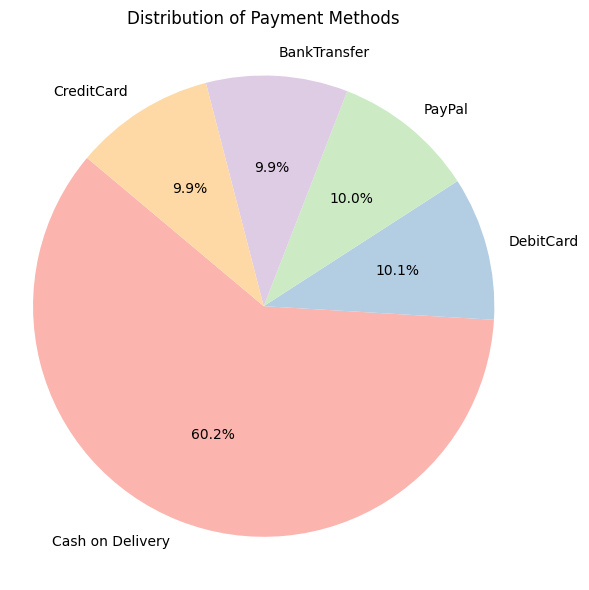

In [8]:
payment_counts = df["PaymentMethod"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Distribution of Payment Methods")
plt.axis('equal')
plt.tight_layout()
plt.show()


Cash on Delivery (COD) is by far the most preferred payment method.

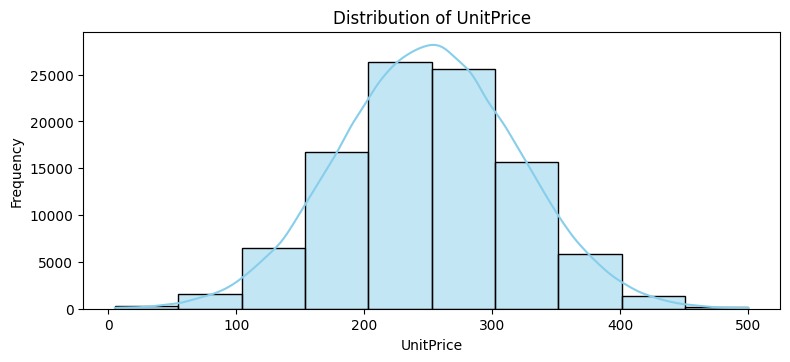

In [9]:
features = ['UnitPrice']
plt.figure(figsize=(8,10))
for i, feature in enumerate(features):
    plt.subplot(3, 1, i+1)
    sns.histplot(df[feature], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

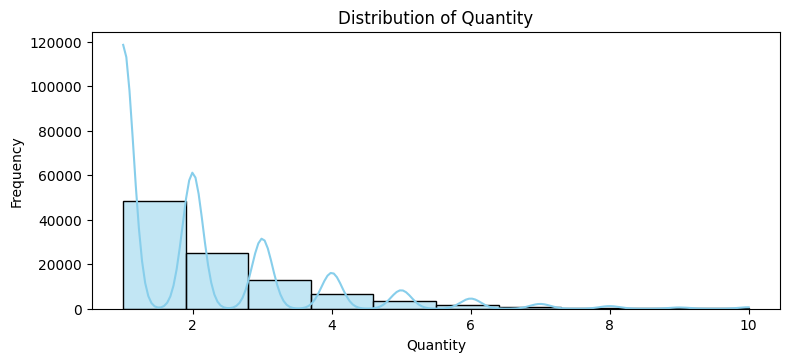

In [10]:
features = ['Quantity']
plt.figure(figsize=(8,10))
for i, feature in enumerate(features):
    plt.subplot(3, 1, i+1)
    sns.histplot(df[feature], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

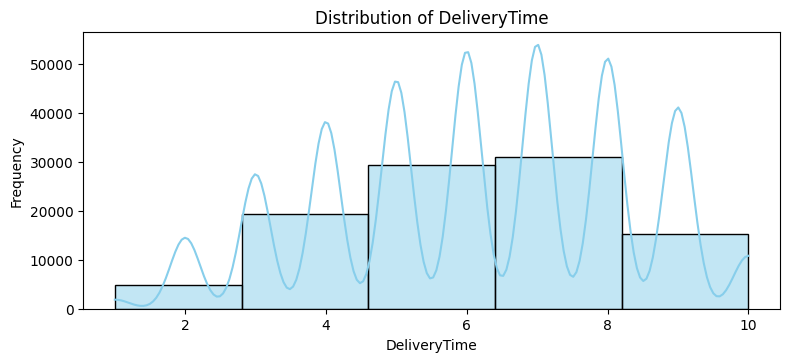

In [11]:
features = ['DeliveryTime']
plt.figure(figsize=(8,10))
for i, feature in enumerate(features):
    plt.subplot(3, 1, i+1)
    sns.histplot(df[feature], kde=True, bins=5, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Distribution of UnitPrice**

- The distribution is approximately normal (bell-shaped), centered around ₹250.

- Most unit prices lie between ₹150 and ₹350.

- There is no strong skew, indicating a balanced pricing structure.

- The smoothness and symmetry suggest consistent pricing strategies across product types.

**Distribution of Quantity**

- The distribution is right-skewed, with a sharp peak at quantity = 1.

- Majority of transactions are for small quantities, especially 1 or 2 items.

- Purchases of 5 or more items are infrequent, indicating a retail-like behavior (single or low-item orders).

**Distribution of DeliveryTime**

- Delivery times are concentrated between 7 and 8 days, with the peak at 8 days.

- The distribution is slightly left-skewed, suggesting some customers receive items faster than average.

- Most of the Delivery is taking place after 7 days.

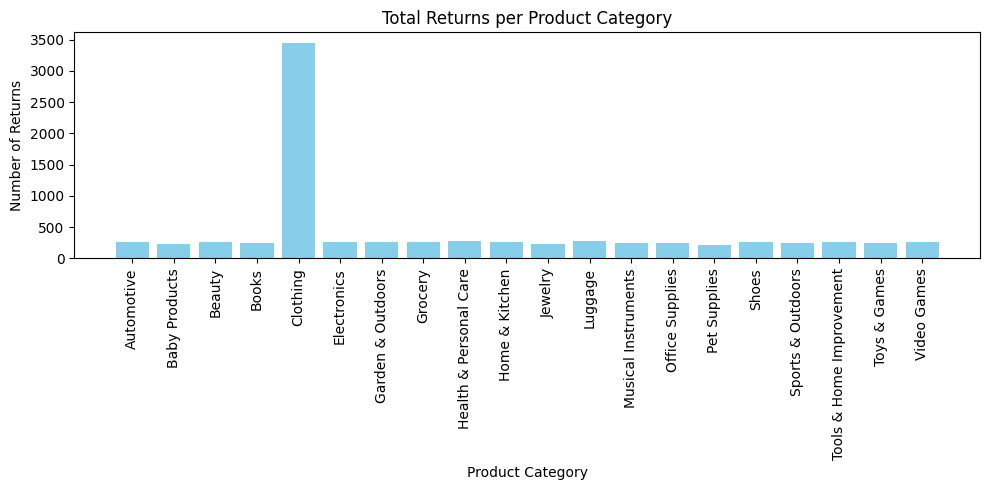

In [12]:
return_counts = df.groupby("ProductCategory")["ReturnStatus"].sum()
plt.figure(figsize=(10,5))
plt.bar(return_counts.index, return_counts.values, color='skyblue')
plt.xlabel("Product Category")
plt.ylabel("Number of Returns")
plt.title("Total Returns per Product Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Implication:** Clothing products have very high Return Status.


In [13]:
customer_df = df.groupby("CustomerID").agg({
    "InvoiceDate": [min, max, 'nunique'],
    "Quantity": "sum",
    "UnitPrice": "mean",
    "CouponUsed": "mean",
    "ReturnStatus": "mean",
    "DeliveryTime": "mean"
})

<ipython-input-13-34e3ae56e1b9>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  customer_df = df.groupby("CustomerID").agg({
<ipython-input-13-34e3ae56e1b9>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  customer_df = df.groupby("CustomerID").agg({


In [14]:
customer_df.head()

InvoiceDate                     Quantity   UnitPrice CouponUsed  \
                   min         max nunique      sum        mean       mean   
CustomerID                                                                   
CUST1000    2021-01-14  2023-08-28      16       30  253.985000   0.187500   
CUST1001    2021-01-24  2023-07-10      25       53  234.156400   0.320000   
CUST1002    2021-01-04  2023-04-27       8       12  220.376250   0.375000   
CUST1003    2021-01-12  2023-02-14      22       47  259.646818   0.136364   
CUST1004    2021-01-13  2023-05-31      16       33  267.853529   0.235294   

           ReturnStatus DeliveryTime  
                   mean         mean  
CustomerID                            
CUST1000         0.1875     5.875000  
CUST1001         0.0400     5.680000  
CUST1002         0.0000     5.375000  
CUST1003         0.0000     6.590909  
CUST1004         0.0000     5.823529

In [15]:
df["TotalSpend"]=df["UnitPrice"]*df["Quantity"]

In [16]:
customer_df['InvoiceDate','min'] = pd.to_datetime(customer_df['InvoiceDate','min'])
customer_df['InvoiceDate','max'] = pd.to_datetime(customer_df['InvoiceDate','max'])
customer_df['TenureMonths'] = (customer_df['InvoiceDate','max'].dt.year - customer_df['InvoiceDate','min'].dt.year) * 12 + (customer_df['InvoiceDate','max'].dt.month - customer_df['InvoiceDate','min'].dt.month)
df = df.merge(customer_df['TenureMonths'], on='CustomerID', how='left')

In [17]:
df['InvoiceDate'].max()

'2024-01-01'

Let this be the cut-off date


In [18]:
cutoff_date= customer_df['InvoiceDate','max'].max()
customer_df["RecencyDay"]= cutoff_date - customer_df['InvoiceDate','max']
customer_df["RecencyDay"]=customer_df["RecencyDay"].dt.days

In [19]:
monetary_df = df.groupby("CustomerID")["TotalSpend"].sum().reset_index()
monetary_df.rename(columns={"TotalSpend": "Monetary"}, inplace=True)


In [20]:
monetary_df.head()

,CustomerID,Monetary
0,CUST1000,7635.57
1,CUST1001,12522.12
2,CUST1002,2733.91
3,CUST1003,13181.89
4,CUST1004,8690.64


In [21]:
customer_df.columns = [f"InvoiceDate_{col[1]}" if col[0] == "InvoiceDate" else col for col in customer_df.columns]

In [22]:
customer_df = customer_df.merge(monetary_df, on="CustomerID", how="left")


In [23]:
customer_df.columns = [
    'CustomerID', 'InvoiceDate_min', 'InvoiceDate_max', 'Frequency',
    'Quantity_sum', 'UnitPrice_mean', 'CouponUsed_mean', 'ReturnStatus_mean',
    'DeliveryTime_mean', 'TenureMonths', 'RecencyDay', 'Monetary'
]


In [24]:
customer_df.head()

,CustomerID,InvoiceDate_min,InvoiceDate_max,Frequency,Quantity_sum,UnitPrice_mean,CouponUsed_mean,ReturnStatus_mean,DeliveryTime_mean,TenureMonths,RecencyDay,Monetary
0,CUST1000,2021-01-14,2023-08-28,16,30,253.985000,0.187500,0.1875,5.875000,31,126,7635.57
1,CUST1001,2021-01-24,2023-07-10,25,53,234.156400,0.320000,0.0400,5.680000,30,175,12522.12
2,CUST1002,2021-01-04,2023-04-27,8,12,220.376250,0.375000,0.0000,5.375000,27,249,2733.91
3,CUST1003,2021-01-12,2023-02-14,22,47,259.646818,0.136364,0.0000,6.590909,25,321,13181.89
4,CUST1004,2021-01-13,2023-05-31,16,33,267.853529,0.235294,0.0000,5.823529,28,215,8690.64


In [25]:
customer_df['R_Score'] = pd.qcut(customer_df['RecencyDay'], q=4, labels=[4, 3, 2, 1]).astype(int)
customer_df['F_Score'] = pd.qcut(customer_df['Frequency'], q=4, labels=[1, 2, 3, 4]).astype(int)
customer_df['M_Score'] = pd.qcut(customer_df['Monetary'], q=4, labels=[1, 2, 3, 4]).astype(int)

customer_df['RFM_Score'] = customer_df['R_Score'].astype(str) + customer_df['F_Score'].astype(str) + customer_df['M_Score'].astype(str)


In [26]:
customer_df.head()

,CustomerID,InvoiceDate_min,InvoiceDate_max,Frequency,Quantity_sum,UnitPrice_mean,CouponUsed_mean,ReturnStatus_mean,DeliveryTime_mean,TenureMonths,RecencyDay,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,CUST1000,2021-01-14,2023-08-28,16,30,253.985000,0.187500,0.1875,5.875000,31,126,7635.57,4,1,1,411
1,CUST1001,2021-01-24,2023-07-10,25,53,234.156400,0.320000,0.0400,5.680000,30,175,12522.12,3,4,4,344
2,CUST1002,2021-01-04,2023-04-27,8,12,220.376250,0.375000,0.0000,5.375000,27,249,2733.91,2,1,1,211
3,CUST1003,2021-01-12,2023-02-14,22,47,259.646818,0.136364,0.0000,6.590909,25,321,13181.89,2,3,4,234
4,CUST1004,2021-01-13,2023-05-31,16,33,267.853529,0.235294,0.0000,5.823529,28,215,8690.64,3,1,2,312


In [27]:
from sklearn.preprocessing import StandardScaler

rfm = customer_df[['R_Score', 'F_Score', 'M_Score']]

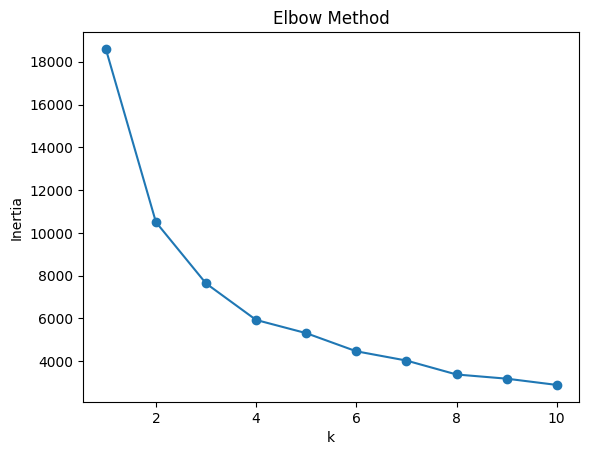

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



In [29]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(rfm)


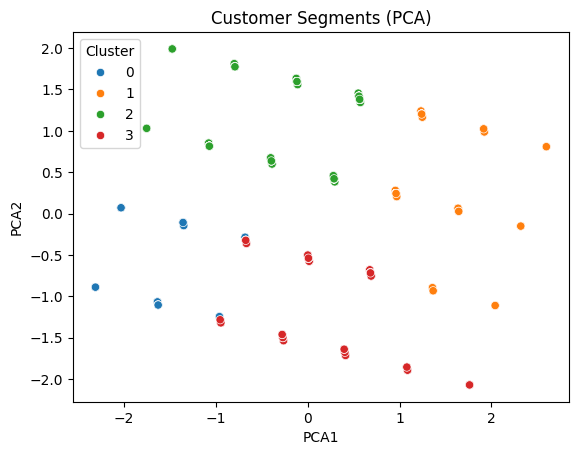

In [30]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm)
customer_df['PCA1'], customer_df['PCA2'] = pca_components[:, 0], pca_components[:, 1]

sns.scatterplot(data=customer_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Customer Segments (PCA)')
plt.show()


**Cluster Segmentation**

- Cluster 0 (Blue): Likely moderate to low activity or spending.

- Cluster 1 (Orange): Could be high spenders with recent activity.

- Cluster 2 (Green): Possibly new or less frequent buyers with medium recency.

- Cluster 3 (Red): Might be inactive/lost customers or price-sensitive (e.g., high returns, coupon dependency).

In [31]:
customer_df["Churn"] = np.where(customer_df["RecencyDay"] > 150, 1, 0)


In [32]:
customer_df.head()

,CustomerID,InvoiceDate_min,InvoiceDate_max,Frequency,Quantity_sum,UnitPrice_mean,CouponUsed_mean,ReturnStatus_mean,DeliveryTime_mean,TenureMonths,RecencyDay,Monetary,R_Score,F_Score,M_Score,RFM_Score,Cluster,PCA1,PCA2,Churn
0,CUST1000,2021-01-14,2023-08-28,16,30,253.985000,0.187500,0.1875,5.875000,31,126,7635.57,4,1,1,411,2,-1.476166,1.990450,0
1,CUST1001,2021-01-24,2023-07-10,25,53,234.156400,0.320000,0.0400,5.680000,30,175,12522.12,3,4,4,344,1,2.319360,-0.151521,1
2,CUST1002,2021-01-04,2023-04-27,8,12,220.376250,0.375000,0.0000,5.375000,27,249,2733.91,2,1,1,211,0,-2.033791,0.070358,1
3,CUST1003,2021-01-12,2023-02-14,22,47,259.646818,0.136364,0.0000,6.590909,25,321,13181.89,2,3,4,234,1,1.365265,-0.933329,1
4,CUST1004,2021-01-13,2023-05-31,16,33,267.853529,0.235294,0.0000,5.823529,28,215,8690.64,3,1,2,312,2,-1.072148,0.814667,1


In [33]:
pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=0f05fb779d787b8c373a1cd044c25fe9333140c773bffbfcdff4d48e91584dd5
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [34]:
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

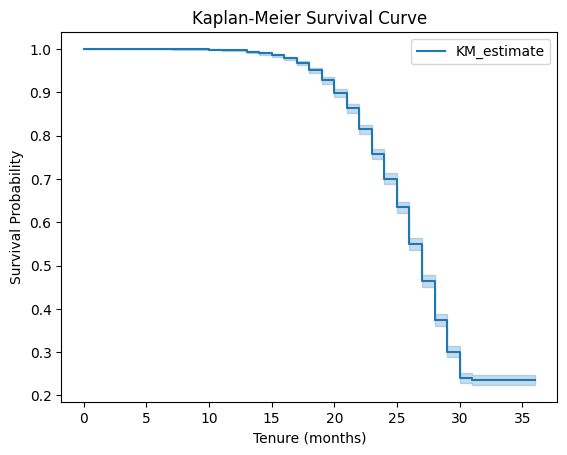

In [35]:
kmf = KaplanMeierFitter()
kmf.fit(durations=customer_df['TenureMonths'], event_observed=customer_df['Churn'])
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Tenure (months)")
plt.ylabel("Survival Probability")
plt.show()


- Initial Period (0–15 months): The survival probability remains high (close to 1.0), indicating that most customers stay engaged during the early phase.

- Middle Period (15–25 months): A gradual decline begins, suggesting that some customers start churning.

- Later Period (25–31 months): A sharp drop is observed, showing significant customer churn during this period.

- Post 31 Months: The survival probability levels off around 0.22, meaning only ~22% of customers remain after 31 months.

In [36]:
group1 = customer_df[customer_df['DeliveryTime_mean'] < 5]
group2 = customer_df[customer_df['DeliveryTime_mean'] > 5]

results = logrank_test(group1['TenureMonths'], group2['TenureMonths'],
                       event_observed_A=group1['Churn'],
                       event_observed_B=group2['Churn'])

print("Log-rank p-value:", results.p_value)


Log-rank p-value: 0.34765256138293665


p-value = 0.3477, which is greater than 0.05.

There is no statistically significant difference in customer churn survival rates between the two groups based on average delivery time (<5 vs >5 days).

In [37]:
df_model = customer_df.drop(columns=['CustomerID', 'InvoiceDate_min', 'InvoiceDate_max', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'Cluster', 'PCA1', 'PCA2'])
cph = CoxPHFitter()
cph.fit(df_model, duration_col='TenureMonths', event_col='Churn')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5000 total observations, 1190 right-censored observations>
             duration col = 'TenureMonths'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 5000
number of events observed = 3810
   partial log-likelihood = -21803.03
         time fit was run = 2025-05-06 08:31:49 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
Frequency         -0.03      0.97      0.01           -0.04           -0.02                0.96                0.98
Quantity_sum      -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
UnitPrice_mean    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
CouponUsed_mean    0.08      1.08      0.16           -0.22            0.39                0.80                1.47
ReturnStatus_mean -0.12      0.89      0.26           -0.62            0.39                0.54                1.47
DeliveryTime_mean  0.01      1.01      0.03           -0.06            0.07                0.94                1.07
RecencyDay         0.06      1.06      0.00            0.06            0.06                1.06                1.06
Monetary           0.00      1.00      0.00           -0.00            0.00                1.00                1.00

                   cmp to     z      p  -log2(p)
covariate                                       
Frequency            0.00 -4.49 <0.005     17.07
Quantity_sum         0.00 -0.27   0.79      0.34
UnitPrice_mean       0.00 -0.41   0.68      0.56
CouponUsed_mean      0.00  0.52   0.60      0.73
ReturnStatus_mean    0.00 -0.45   0.65      0.62
DeliveryTime_mean    0.00  0.18   0.86      0.22
RecencyDay           0.00 78.67 <0.005       inf
Monetary             0.00  0.34   0.73      0.45
---
Concordance = 0.98
Partial AIC = 43622.05
log-likelihood ratio test = 17070.26 on 8 df
-log2(p) of ll-ratio test = inf

### 🧾 Inference Summary (Cox Proportional Hazards Model):

1. **High Model Accuracy**: Concordance of **0.98** indicates excellent predictive power of the model in ordering survival times.

2. **Model Significance**: The overall model is statistically significant based on the **log-likelihood ratio test (p < 0.005)**.

3. **Significant Predictor**:

   * **Frequency** has a **negative coefficient (-0.03)** with **p < 0.005**, meaning higher purchase frequency **reduces the risk of churn** (by \~3% per unit increase).

4. **Non-significant Predictors** (p > 0.05):

   * `Quantity_sum`, `UnitPrice_mean`, `CouponUsed_mean`, `ReturnStatus_mean`, `DeliveryTime_mean`, and `Monetary` **do not significantly affect churn**.

5. **RecencyDay Anomaly**:

   * Although significant (**p < 0.005**), its **extremely high z-score (78.67)** may indicate a **data issue or multicollinearity**, requiring further validation.

6. **Delivery Time**:

   * Consistent with the **log-rank test (p = 0.3476)**, `DeliveryTime_mean` **does not significantly impact survival time (churn risk)**.


In [39]:
from scipy.stats import f_oneway
grouped = [group['UnitPrice'].values for name, group in df.groupby('Country')]
anova_result = f_oneway(*grouped)
print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)

ANOVA F-statistic: 0.4840848998394598
ANOVA p-value: 0.8207310296210545


The ANOVA results indicate that there is no significant difference in the mean 'UnitPrice' across the different countries, as the p-value (0.82) is much greater than the typical significance level (0.05).

In [40]:
from scipy.stats import chi2_contingency
customer_df['DeliveryTimeBin'] = pd.cut(customer_df['DeliveryTime_mean'], bins=3)
contingency = pd.crosstab(customer_df['DeliveryTimeBin'], customer_df['Churn'])
chi2, p, dof, ex = chi2_contingency(contingency)
print('Chi-square statistic:', chi2)
print('p-value:', p)

Chi-square statistic: 0.997706780788081
p-value: 0.6072265124528498


The Chi-square test results suggest that there is no significant association between 'DeliveryTimeBin' and 'Churn', as the p-value (0.61) is greater than the typical significance level (0.05).










In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

customer_df = customer_df[customer_df['TenureMonths'] > 0]
customer_df['AvgMonthlySpend'] = customer_df['Monetary'] / customer_df['TenureMonths']

X = customer_df[['Frequency', 'Quantity_sum', 'UnitPrice_mean', 'CouponUsed_mean', 'ReturnStatus_mean', 'DeliveryTime_mean', 'RecencyDay']]
y = customer_df['AvgMonthlySpend']  # or use 'Monetary' as total CLV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")


Linear: RMSE=1078.10, MAE=22.93, R²=0.93
Ridge: RMSE=1078.18, MAE=22.93, R²=0.93
Lasso: RMSE=1078.05, MAE=22.90, R²=0.93
RandomForest: RMSE=643.01, MAE=18.04, R²=0.96
XGBoost: RMSE=652.13, MAE=18.34, R²=0.96


The RandomForest and XGBoost models both exhibit significantly lower RMSE and MAE values compared to the linear models, highlighting their superior ability to minimize prediction errors. Both models also have a higher R² value (0.96), indicating that they explain more of the variance in the data. On the other hand, the linear models (Linear, Ridge, and Lasso) show similar performance, with an R² value of 0.93, suggesting they provide a good fit but are less accurate than the ensemble methods (RandomForest and XGBoost). Overall, RandomForest and XGBoost are better suited for this problem, likely due to their ability to capture more complex relationships in the data.